In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [29]:
ruta= "C:/Users/lamas/Documents/Ejercicios/Prácticas/bmw_pricing_v3 (1).csv"

In [30]:
df= pd.read_csv(ruta)

In [31]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [32]:
df.groupby(["tipo_gasolina"]).agg({"precio" : "describe"})

precio                                                         \
                count          mean           std      min      25%      50%   
tipo_gasolina                                                                  
Diesel            5.0  13960.000000   6092.454349   6500.0  11800.0  12700.0   
diesel         4625.0  15859.264865   8973.584667    100.0  10900.0  14300.0   
electro           3.0  20966.666667    208.166600  20800.0  20850.0  20900.0   
hybrid_petrol     8.0  37575.000000  26731.669287  15500.0  20900.0  25000.0   
petrol          191.0  14398.429319  12374.619511    400.0   6100.0  11900.0   

                                  
                   75%       max  
tipo_gasolina                     
Diesel         15700.0   23100.0  
diesel         18600.0  178500.0  
electro        21050.0   21200.0  
hybrid_petrol  47775.0   95200.0  
petrol         18900.0   82400.0

In [ ]:
#ordenar por precio y la media del propio precio, agrupado por "tipo_gasolina"
df.groupby(["tipo_gasolina"]).agg({"precio" : "describe"}).sort_values(by=("precio","mean"))

precio                                                         \
                count          mean           std      min      25%      50%   
tipo_gasolina                                                                  
Diesel            5.0  13960.000000   6092.454349   6500.0  11800.0  12700.0   
petrol          191.0  14398.429319  12374.619511    400.0   6100.0  11900.0   
diesel         4625.0  15859.264865   8973.584667    100.0  10900.0  14300.0   
electro           3.0  20966.666667    208.166600  20800.0  20850.0  20900.0   
hybrid_petrol     8.0  37575.000000  26731.669287  15500.0  20900.0  25000.0   

                                  
                   75%       max  
tipo_gasolina                     
Diesel         15700.0   23100.0  
petrol         18900.0   82400.0  
diesel         18600.0  178500.0  
electro        21050.0   21200.0  
hybrid_petrol  47775.0   95200.0

In [41]:
df.tipo_gasolina.unique()

array(['diesel', 'petrol', 'Desconocido', 'hybrid_petrol', 'Diesel',
       'electro'], dtype=object)

In [37]:
df["tipo_gasolina"] = df["tipo_gasolina"].fillna("Desconocido")

In [39]:
df["tipo_gasolina"].isna().sum()

np.int64(0)

In [46]:
#porcentaje que representan los 3 principales valores sobre el total
(df.tipo_gasolina.value_counts().head(3).sum())/100


np.float64(48.3)

In [44]:
#transform
df.groupby("tipo_gasolina")["precio"].transform("mean")

0       15859.264865
1       14398.429319
2       15859.264865
3       15859.264865
4       15859.264865
            ...     
4838    15859.264865
4839    15859.264865
4840    15859.264865
4841    15859.264865
4842    15859.264865
Name: precio, Length: 4843, dtype: float64

In [5]:
df.shape

(4843, 18)

In [6]:
(df.isnull().sum()/len(df))*100

marca                          20.028908
modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

Columna con valores inconsistentes: asientos_traseros_plegables

In [7]:
#Ordenar de mayor a menor
df.isnull().sum().sort_values(ascending=False)

asientos_traseros_plegables    3391
fecha_registro                 2423
tipo_coche                     1460
marca                           970
alerta_lim_velocidad            728
bluetooth                       728
aire_acondicionado              486
color                           445
precio                            6
tipo_gasolina                     5
volante_regulable                 4
modelo                            3
elevalunas_electrico              2
km                                2
camara_trasera                    2
potencia                          1
fecha_venta                       1
gps                               0
dtype: int64

<Axes: >

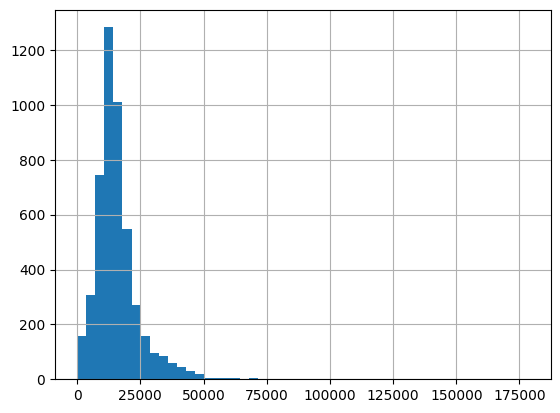

In [8]:
df.precio.hist(bins = 50)

In [9]:
df.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [18]:
df.precio.sort_values().tail(20)

2824     63700.0
3829     64300.0
3069     65400.0
4749     66600.0
3345     68300.0
3320     68300.0
3595     68700.0
1        69700.0
4731     73100.0
2938     75000.0
4146     82400.0
90       95200.0
4684    142800.0
4753    178500.0
117          NaN
524          NaN
539          NaN
549          NaN
569          NaN
584          NaN
Name: precio, dtype: float64

In [22]:
df.dtypes

marca                           object
modelo                          object
km                             float64
potencia                       float64
fecha_registro                  object
tipo_gasolina                   object
color                           object
tipo_coche                      object
volante_regulable               object
aire_acondicionado              object
camara_trasera                  object
asientos_traseros_plegables     object
elevalunas_electrico            object
bluetooth                       object
gps                               bool
alerta_lim_velocidad            object
precio                         float64
fecha_venta                     object
dtype: object

In [12]:
lista_variables_numericas = ["precio","km", "potencia"]

In [13]:
df[lista_variables_numericas].corr()

,precio,km,potencia
precio,1.000000,-0.410189,0.639254
km,-0.410189,1.000000,-0.050141
potencia,0.639254,-0.050141,1.000000


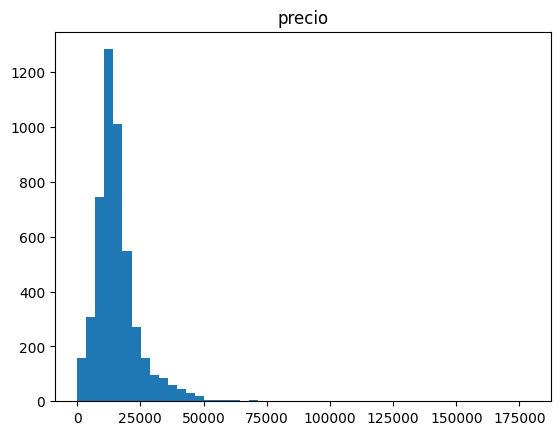

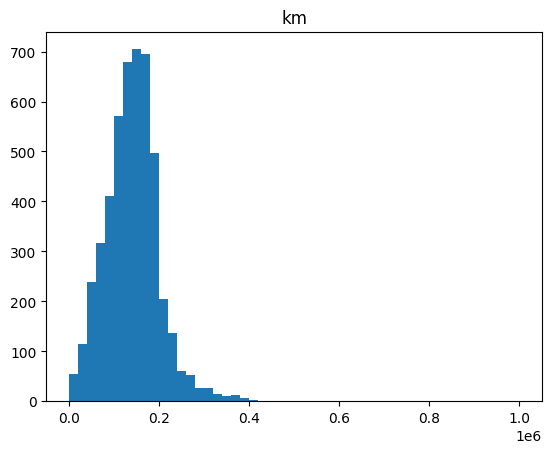

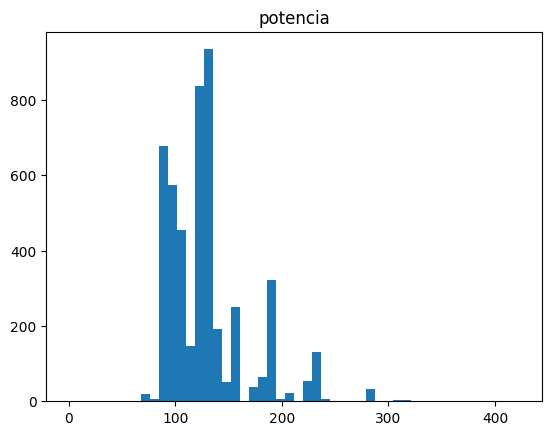

In [ ]:
#generar histograma para cada una de las variables numéricas
for columna in lista_variables_numericas:
    plt.hist(df[columna], bins= 50)
    plt.title(columna)
    plt.show()

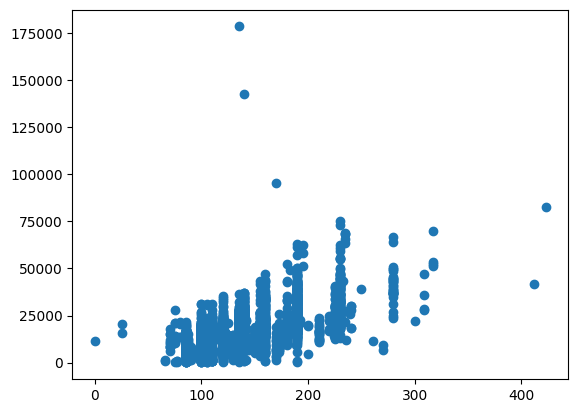

In [14]:
plt.scatter(
    y=df["precio"],
    x=df["potencia"]
)


In [15]:
df_sin_outliers = df.loc[(df.precio< 10000) & (df.potencia<300)]

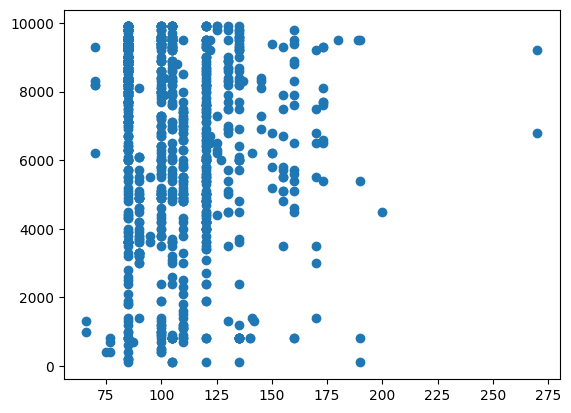

In [16]:
plt.scatter(
    y=df_sin_outliers["precio"],
    x=df_sin_outliers["potencia"]
)


In [17]:
df_sin_outliers.sample(10)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1464,BMW,320,275833.0,120.0,NaN,diesel,black,estate,True,True,False,NaN,False,NaN,True,False,5700.0,2018-06-01
2035,BMW,118,200443.0,105.0,NaN,diesel,black,hatchback,False,True,False,NaN,False,False,True,False,9300.0,2018-03-01
1372,BMW,320,258707.0,120.0,NaN,diesel,grey,NaN,True,False,False,NaN,False,NaN,True,False,4200.0,2018-06-01
2219,BMW,116,116708.0,85.0,2013-08-01,diesel,black,hatchback,False,True,False,False,False,False,True,NaN,9000.0,2018-05-01
840,NaN,520,273538.0,100.0,NaN,diesel,silver,NaN,True,False,False,False,False,False,True,False,1300.0,2018-04-01
956,NaN,318,147992.0,105.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,False,False,False,False,8400.0,2018-04-01
2870,NaN,320,165795.0,120.0,2011-04-01,diesel,blue,sedan,False,False,False,NaN,False,False,True,False,8000.0,2018-03-01
2611,BMW,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
1800,BMW,116,169586.0,85.0,2013-02-01,diesel,black,NaN,False,False,False,NaN,False,NaN,True,False,9100.0,2018-04-01
101,BMW,320,188335.0,130.0,NaN,diesel,grey,coupe,False,False,False,NaN,True,False,True,True,8700.0,2018-05-01


In [19]:
df.dtypes

marca                           object
modelo                          object
km                             float64
potencia                       float64
fecha_registro                  object
tipo_gasolina                   object
color                           object
tipo_coche                      object
volante_regulable               object
aire_acondicionado              object
camara_trasera                  object
asientos_traseros_plegables     object
elevalunas_electrico            object
bluetooth                       object
gps                               bool
alerta_lim_velocidad            object
precio                         float64
fecha_venta                     object
dtype: object

In [25]:
df[lista_variables_numericas].corr()

,precio,km,potencia
precio,1.000000,-0.410189,0.639254
km,-0.410189,1.000000,-0.050141
potencia,0.639254,-0.050141,1.000000


In [27]:
df.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000
